In [219]:
import pandas as pd
import pandas_profiling as pdp
import numpy as np
import os
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.graph_objs import FigureWidget

# DATA COLLECTION

In [43]:
pd.options.display.max_rows = 350
pd.options.display.max_columns = 350

In [45]:
file = 'column_3C_weka.arff'

# Function untuk konversi file arff ke csv
def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent
    
with open(file , "r") as inFile:
     content = inFile.readlines()
     name,ext = os.path.splitext(inFile.name)
     new = toCsv(content)
     with open(name+".csv", "w") as outFile:
            outFile.writelines(new)

### Membaca CSV File

In [2]:
data = pd.read_csv('column_3C_weka.csv')
data

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027818    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis   class  
0        98.672917                 -0.254400  Hernia  
1       114.405425                  4.564259  Hernia  
2       105.985135                 -3.530317  Hernia  
3       101.868495                 11.211523  Hernia  
4       108.168725                  7.918501  Hernia  
..             ...                       ...     ...  
305     117.449062                 -4.245395  Normal  
306     114.365845                 -0.421010  Normal  
307     125.670725                 -2.707880  Normal  
308     118.545842                  0.214750  Normal  
309     123.945244                 -0.199249  Normal  

[310 rows x 7 columns]

### Explanation of Data
### FEATURES:
###    - Pelvic Incidence (PI) adalah sudut antara garis tegak lurus ke lempeng sakral di titik tengahnya, dan garis menghubungkan titik tesebut ke sumbu kepala femoralis (tulang paha).
###    - Pelvic Tilt (PT) adalah sudut antara garis vertical dari kepala femoralis (tulang paha) dan garis menghubungkan titik tesebut ke sumbu kepala femoralis (tulang paha).
###    - Sacral Slope (SS) adalah sudut dataran tinggi sakral horizontal dengan garis pelurus lempeng sakral.
###    - Lumbar Lordosis (LL) adalah sudut antara T12 vertebrae dan dataran tinggi sakral horizontal 
###    - Pelvic Radius (PR) adalah jari-jari panggul, jarak dari sumbu pinggul ke sudut posterior-superior S1 menunjukkan sumbu pinggul terletak di tengah antara dua titik tengah kepala femoralis.
###    - Degree Spondylolisthesis (DS) dinilai berdasarkan derajat selip dari satu tubuh vertebral pada tubuh vertebral yang berdekatan.

### TARGET:
###    - Multiclass (Herniated Disk (Hernia), Normal, Spondylolisthesis)


### Dijadikan dataframe

In [68]:
df = pd.DataFrame(data)
df

7       117.270068                -10.675871             Hernia  
8       125.002893                 13.289018             Hernia  
9        84.241415                  0.664437             Hernia  
10      108.648265                 -7.825986             Hernia  
11      120.055399                  0.499751             Hernia  
12      119.321358                  8.028895             Hernia  
13      110.966698                  7.044803             Hernia  
14      116.806587                  5.766947             Hernia  
15      124.115836                  5.415825             Hernia  
16      112.309492                 -0.622527             Hernia  
17      129.011418                  3.623020             Hernia  
18      123.159251                  1.429186             Hernia  
19      116.585706                 -1.244402             Hernia  
20      134.461016                  6.451648             Hernia  
21      125.212716                  2.432561             Hernia  
22      106.424329                 15.779697             Hernia  
23      117.980830                 -4.987130             Hernia  
24      115.577116                 -3.237562             Hernia  
25      121.447011                  1.571205             Hernia  
26      125.203296                -10.093108             Hernia  
27      109.271634                  8.992816             Hernia  
28      111.072920                  2.652321             Hernia  
29      113.477018                 -2.005892             Hernia  
30      112.192804                 10.869566             Hernia  
31       98.774546                  6.386832             Hernia  
32      117.980325                  5.569620             Hernia  
33      124.914118                  2.703008             Hernia  
34      119.330354                  1.474286             Hernia  
35      113.833145                  4.393080             Hernia  
36      132.264735                  6.413428             Hernia  
37      137.540613                 -0.263490             Hernia  
38      123.311845                  2.812427             Hernia  
39      116.559771                  1.694705             Hernia  
40      106.938852                 -3.460358             Hernia  
41      115.481405                  2.045476             Hernia  
42      121.670915                  5.329843             Hernia  
43      121.219684                 -0.799624             Hernia  
44      114.023117                 -2.325684             Hernia  
45      117.422259                 -2.526702             Hernia  
46      117.384625                  6.481709             Hernia  
47      113.266675                 -4.497958             Hernia  
48      121.046246                 -1.537383             Hernia  
49      118.363389                  2.062963             Hernia  
50      115.877017                  3.558372             Hernia  
51      107.949304                  5.000089             Hernia  
52      128.292515                  5.740614             Hernia  
53      112.684141                 11.463223             Hernia  
54      116.377889                 -9.569250             Hernia  
55       98.249781                  6.273012             Hernia  
56      112.776187                  5.753277             Hernia  
57      116.250917                  1.662706             Hernia  
58      124.846109                 -2.919076             Hernia  
59      124.056452                  7.947905             Hernia  
60      143.560690                 56.125906  Spondylolisthesis  
61      129.955476                 92.027277  Spondylolisthesis  
62      134.711772                 29.106575  Spondylolisthesis  
63      114.818751                 26.931841  Spondylolisthesis  
64      123.932010                 10.431972  Spondylolisthesis  
65      115.012334                 26.588100  Spondylolisthesis  
66      118.530327                 27.383213  Spondylolisthesis  
67       95.903629                 69.55

### Describe digunakan untuk mengeluarkan informasi statistik yang umum yaitu:
- count = menghitung banyaknya data dalam feature
- mean = menghitung rata-rata data dalam feature
- min = nilai terkecil data
- std (standart deviasi) = menghitung jumlah variasi/ sebaran data dalam feature
- 25% = menunjukkan kuartil pertama
- 50% = menunjukkan kuartil kedua
- 75% = menunjukka kuartil ketiga
- max = nilai terbesar data

In [50]:
df.describe()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean          60.496653    17.542822              51.930930     42.953831   
std           17.236520    10.008330              18.554064     13.423102   
min           26.147921    -6.554948              14.000000     13.366931   
25%           46.430294    10.667069              37.000000     33.347122   
50%           58.691038    16.357689              49.562398     42.404912   
75%           72.877696    22.120395              63.000000     52.695888   
max          129.834041    49.431864             125.742385    121.429566   

       pelvic_radius  degree_spondylolisthesis  
count     310.000000                310.000000  
mean      117.920655                 26.296694  
std        13.317377                 37.559027  
min        70.082575                -11.058179  
25%       110.709196                  1.603727  
50%       118.268178                 11.767934  
75%       125.467674                 41.287352  
max       163.071041                418.543082

Setelah informasi statistik tersebut dilihat seksama, terdapat kejanggalan nilai data dalam max degree_spondylolisthesis, maka dilakukan visualisasi boxplot langsung untuk mengecek sebaran data, sebelum itu akan dilakukan pengecekan NaN value terlebih dahulu.

In [222]:
profile_raw = df.profile_report(title = 'Pandas Profiling Report')
profile_raw.to_file(output_file="raw_data_profiling.html")

build report structure: 100%|██████████| 1/1 [00:05<00:00,  5.55s/it]


### Mengecek NaN Value dan melihat bentuk data

In [83]:
print(df.isnull().sum())
print(df.shape)

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
(310, 7)


Dapat dilihat bahwa seluruh data tidak memiliki null value

### Melihat outliers
- Histogram

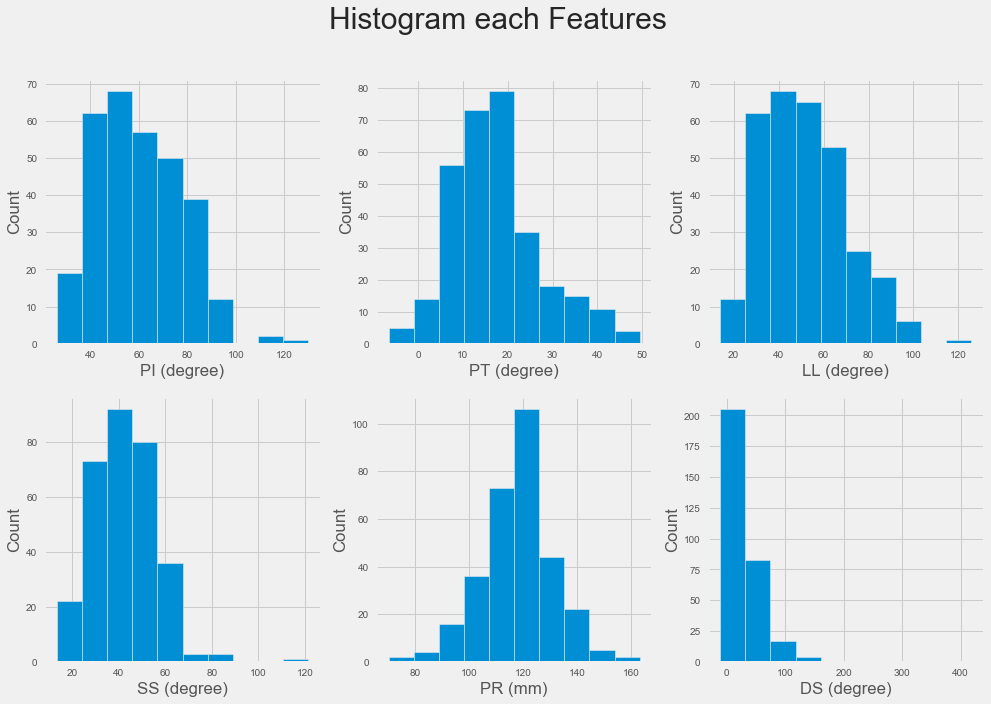

In [223]:
plt.figure(figsize=(15,10))
plt.style.use("fivethirtyeight")
plt.suptitle("Histogram each Features", fontsize=30)

plt.subplot(231)
df['pelvic_incidence'].hist()
plt.xlabel('PI (degree)')
plt.ylabel('Count')

plt.subplot(232)
df['pelvic_tilt'].hist()
plt.xlabel('PT (degree)')
plt.ylabel('Count')

plt.subplot(233)
df['lumbar_lordosis_angle'].hist()
plt.xlabel('LL (degree)')
plt.ylabel('Count')

plt.subplot(234)
df['sacral_slope'].hist()
plt.xlabel('SS (degree)')
plt.ylabel('Count')

plt.subplot(235)
df['pelvic_radius'].hist()
plt.xlabel('PR (mm)')
plt.ylabel('Count')

plt.subplot(236)
df['degree_spondylolisthesis'].hist()
plt.xlabel('DS (degree)')
plt.ylabel('Count')

plt.show()

Dapat dilihat dari histogram di atas bahwa sebaran PT dan PR terlihat normal, dan PI, LL, dan SS masih terlihat cukup normal dengan outliers yang terlihat, namun DS dengan plot range hingga 400 namun tidak terlihat secara visual dalam count y-axis.

- boxplot

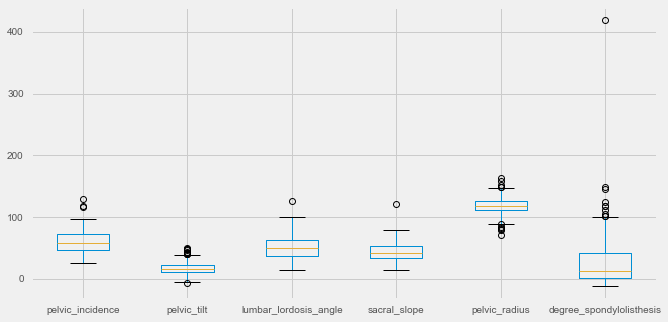

In [87]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

### Dapat dilihat pada box plot di atas, bahwasanya pada degree_spondylolisthesis terdapat satu node outliers yang berada sangat jauh dari batas atas maupun outliers yang lain, karena data menggunakan satuan derajat dengan polaritas, maka kemungkinan min-max range dari derajat tersebut adalah -180 hingga 180.
### Maka dari itu, saya akan menghapus data pada row tersebut. 

In [71]:
df[df['degree_spondylolisthesis']>=180]

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
115        129.834041     8.404475              48.384057    121.429566   

     pelvic_radius  degree_spondylolisthesis              class  
115     107.690466                418.543082  Spondylolisthesis

In [74]:
df0 = df.drop(index=115)
df0 = df0.reset_index(drop=True)
df0

6       120.567523                  5.988551             Hernia  
7       117.270068                -10.675871             Hernia  
8       125.002893                 13.289018             Hernia  
9        84.241415                  0.664437             Hernia  
10      108.648265                 -7.825986             Hernia  
11      120.055399                  0.499751             Hernia  
12      119.321358                  8.028895             Hernia  
13      110.966698                  7.044803             Hernia  
14      116.806587                  5.766947             Hernia  
15      124.115836                  5.415825             Hernia  
16      112.309492                 -0.622527             Hernia  
17      129.011418                  3.623020             Hernia  
18      123.159251                  1.429186             Hernia  
19      116.585706                 -1.244402             Hernia  
20      134.461016                  6.451648             Hernia  
21      125.212716                  2.432561             Hernia  
22      106.424329                 15.779697             Hernia  
23      117.980830                 -4.987130             Hernia  
24      115.577116                 -3.237562             Hernia  
25      121.447011                  1.571205             Hernia  
26      125.203296                -10.093108             Hernia  
27      109.271634                  8.992816             Hernia  
28      111.072920                  2.652321             Hernia  
29      113.477018                 -2.005892             Hernia  
30      112.192804                 10.869566             Hernia  
31       98.774546                  6.386832             Hernia  
32      117.980325                  5.569620             Hernia  
33      124.914118                  2.703008             Hernia  
34      119.330354                  1.474286             Hernia  
35      113.833145                  4.393080             Hernia  
36      132.264735                  6.413428             Hernia  
37      137.540613                 -0.263490             Hernia  
38      123.311845                  2.812427             Hernia  
39      116.559771                  1.694705             Hernia  
40      106.938852                 -3.460358             Hernia  
41      115.481405                  2.045476             Hernia  
42      121.670915                  5.329843             Hernia  
43      121.219684                 -0.799624             Hernia  
44      114.023117                 -2.325684             Hernia  
45      117.422259                 -2.526702             Hernia  
46      117.384625                  6.481709             Hernia  
47      113.266675                 -4.497958             Hernia  
48      121.046246                 -1.537383             Hernia  
49      118.363389                  2.062963             Hernia  
50      115.877017                  3.558372             Hernia  
51      107.949304                  5.000089             Hernia  
52      128.292515                  5.740614             Hernia  
53      112.684141                 11.463223             Hernia  
54      116.377889                 -9.569250             Hernia  
55       98.249781                  6.273012             Hernia  
56      112.776187                  5.753277             Hernia  
57      116.250917                  1.662706             Hernia  
58      124.846109                 -2.919076             Hernia  
59      124.056452                  7.947905             Hernia  
60      143.560690                 56.125906  Spondylolisthesis  
61      129.955476                 92.027277  Spondylolisthesis  
62      134.711772                 29.106575  Spondylolisthesis  
63      114.818751                 26.931841  Spondylolisthesis  
64      123.932010                 10.431972  Spondylolisthesis  
65      115.012334                 26.588100  Spondylolisthesis  
66      118.530327                 27.38

In [141]:
df0.describe()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count        309.000000   309.000000             309.000000    309.000000   
mean          60.272260    17.572396              51.942408     42.699864   
std           16.804832    10.010988              18.583057     12.676949   
min           26.147921    -6.554948              14.000000     13.366931   
25%           46.426366    10.688698              37.000000     33.340707   
50%           58.599529    16.417462              49.775534     42.373594   
75%           72.643850    22.181798              63.000000     52.549422   
max          118.144655    49.431864             125.742385     79.695154   

       pelvic_radius  degree_spondylolisthesis  
count     309.000000                309.000000  
mean      117.953762                 25.027289  
std        13.326194                 30.234211  
min        70.082575                -11.058179  
25%       110.709912                  1.594748  
50%       118.343321                 11.463223  
75%       125.480174                 40.880923  
max       163.071041                148.753711

### Melihat sebaran data

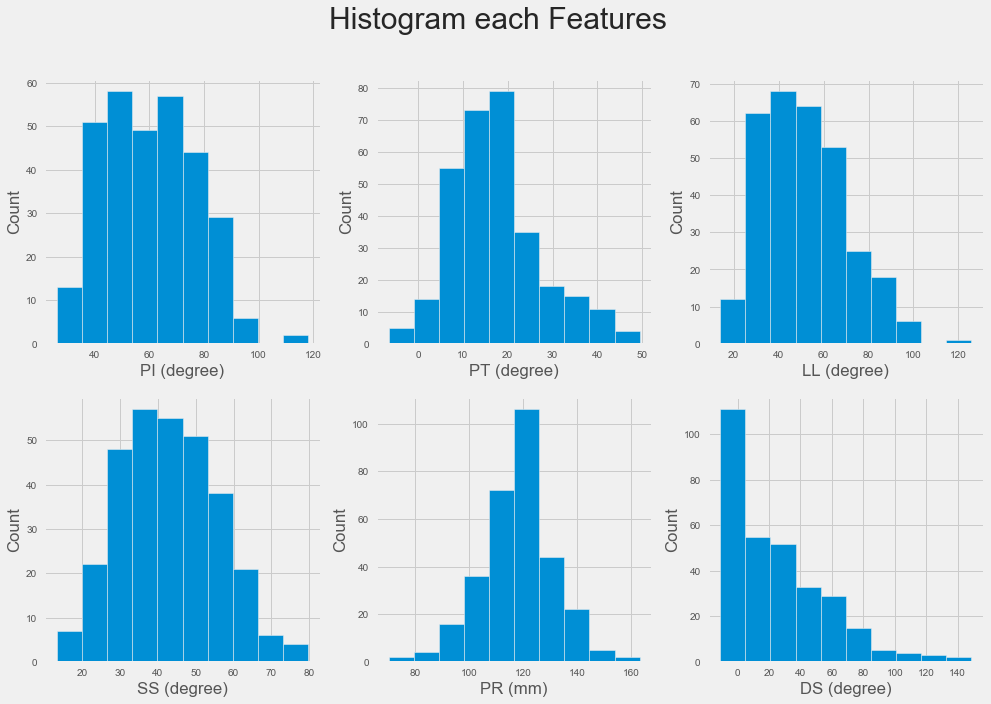

In [224]:
plt.figure(figsize=(15,10))
plt.style.use("fivethirtyeight")
plt.suptitle("Histogram each Features", fontsize=30)

plt.subplot(231)
df0['pelvic_incidence'].hist()
plt.xlabel('PI (degree)')
plt.ylabel('Count')

plt.subplot(232)
df0['pelvic_tilt'].hist()
plt.xlabel('PT (degree)')
plt.ylabel('Count')

plt.subplot(233)
df0['lumbar_lordosis_angle'].hist()
plt.xlabel('LL (degree)')
plt.ylabel('Count')

plt.subplot(234)
df0['sacral_slope'].hist()
plt.xlabel('SS (degree)')
plt.ylabel('Count')

plt.subplot(235)
df0['pelvic_radius'].hist()
plt.xlabel('PR (mm)')
plt.ylabel('Count')

plt.subplot(236)
df0['degree_spondylolisthesis'].hist()
plt.xlabel('DS (degree)')
plt.ylabel('Count')

plt.show()

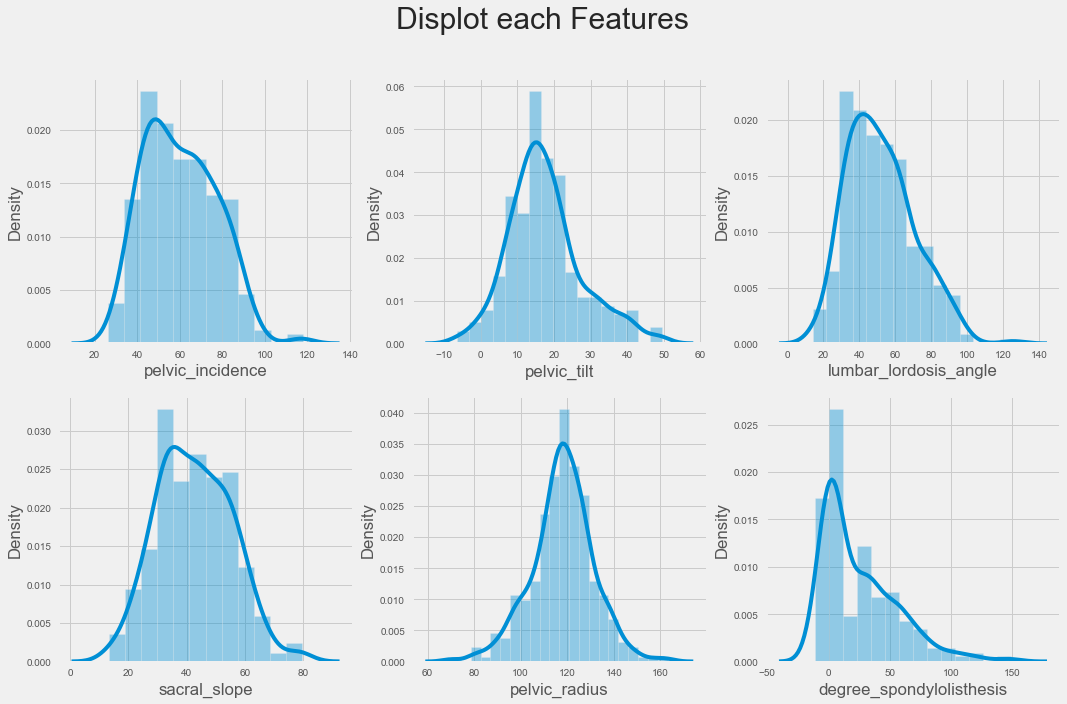

In [170]:
plt.figure(figsize=(16,10))
plt.suptitle("Displot each Features", fontsize=30)
plt.ylabel("Density")

plt.subplot(231)
sb.distplot(df0['pelvic_incidence'])
plt.ylabel("Density")

plt.subplot(232)
sb.distplot(df0['pelvic_tilt'])
plt.ylabel("Density")

plt.subplot(233)
sb.distplot(df0['lumbar_lordosis_angle'])
plt.ylabel("Density")

plt.subplot(234)
sb.distplot(df0['sacral_slope'])
plt.ylabel("Density")

plt.subplot(235)
sb.distplot(df0['pelvic_radius'])
plt.ylabel("Density")

plt.subplot(236)
sb.distplot(df0['degree_spondylolisthesis'])
plt.ylabel("Density")

plt.show()

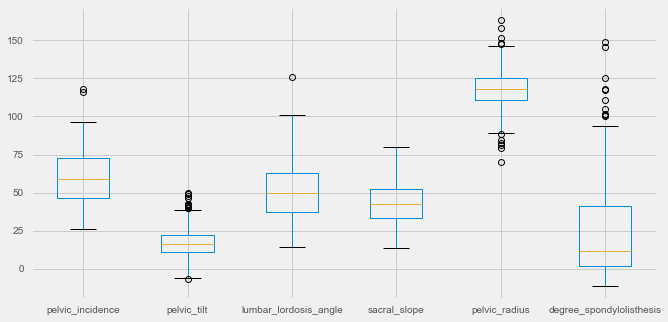

In [86]:
plt.figure(figsize=(10,5))
df0.boxplot()
plt.show()

### Checking ouliers data with Interquartile Method

In [200]:
q1 = df0.quantile(0.25)
q1

pelvic_incidence             46.426366
pelvic_tilt                  10.688698
lumbar_lordosis_angle        37.000000
sacral_slope                 33.340707
pelvic_radius               110.709912
degree_spondylolisthesis      1.594748
Name: 0.25, dtype: float64

In [202]:
q2 = df0.quantile(0.5)
q2

pelvic_incidence             58.599529
pelvic_tilt                  16.417462
lumbar_lordosis_angle        49.775534
sacral_slope                 42.373594
pelvic_radius               118.343321
degree_spondylolisthesis     11.463223
Name: 0.5, dtype: float64

In [204]:
q3 = df0.quantile(0.75)
q3

pelvic_incidence             72.643850
pelvic_tilt                  22.181798
lumbar_lordosis_angle        63.000000
sacral_slope                 52.549422
pelvic_radius               125.480174
degree_spondylolisthesis     40.880923
Name: 0.75, dtype: float64

In [225]:
iqr = q3 - q1
iqr

pelvic_incidence            26.217484
pelvic_tilt                 11.493100
lumbar_lordosis_angle       26.000000
sacral_slope                19.208714
pelvic_radius               14.770262
degree_spondylolisthesis    39.286175
dtype: float64

In [206]:
outliers_atas = q3 + 1.5 * iqr
outliers_atas

pelvic_incidence            111.970076
pelvic_tilt                  39.421447
lumbar_lordosis_angle       102.000000
sacral_slope                 81.362493
pelvic_radius               147.635567
degree_spondylolisthesis     99.810185
dtype: float64

In [207]:
outliers_bawah = q1 - 1.5 * iqr
outliers_bawah

pelvic_incidence             7.100140
pelvic_tilt                 -6.550951
lumbar_lordosis_angle       -2.000000
sacral_slope                 4.527636
pelvic_radius               88.554519
degree_spondylolisthesis   -57.334514
dtype: float64

In [210]:
df_out_bawah = df0.iloc[:,:-1][df0.iloc[:,:-1]>outliers_bawah]
df_out = df_out_bawah[df_out_bawah<outliers_atas]
df_out.isnull().sum()

pelvic_incidence             2
pelvic_tilt                 13
lumbar_lordosis_angle        1
sacral_slope                 0
pelvic_radius               11
degree_spondylolisthesis    10
dtype: int64

In [212]:
null_row = 0

for i in df_out.isnull().sum(axis=1):
    if i > 0:
        null_row += 1

print(f'Missing row = {round(null_row/len(df_out)*100, 2)} %')

Missing row = 10.03 %


### Perlakuan untuk mencari missing value di atas hanya untuk mengecek banyak ouliers, namun tidak untuk digunakan sebagai data baru dengan menghilangkan missing value, karena dataset diambil berdasarkan biomechanical radiology dan tidak menutup kemungkinan bahwa data pasien nantinya juga tergolong outliers, persentase outliers yang ada juga tergolong tidak seedikit sehingga tidak bisa diabaikan dalam penggunaan dataset.

### Target Selection

In [89]:
df0['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

### Melihat persebaran target data

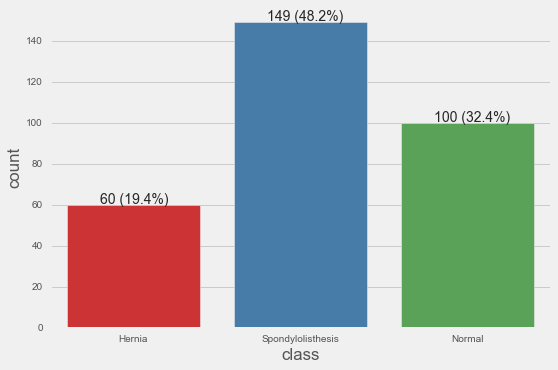

In [140]:
ax = sb.countplot(df0['class'], palette='Set1')
for i in ax.patches:
    ax.annotate('{} ({:.1f}%)'.format(i.get_height(), 100* i.get_height()/len(df0['class'])), (i.get_x()+0.2, i.get_height()+0.5)) 

### Transformasi data pada Target

### - Label Encoder

In [96]:
le = LabelEncoder()
leTarget = le.fit_transform(df0['class'])
leTarget = leTarget.astype('int64')
leTarget

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Dalam labeling encoder di atas dihasilkan
- Hernia = 0
- Normal = 1
- Spondylolilsthesis = 2

In [98]:
class_LE = pd.DataFrame(leTarget, columns=['class_en'])
dfLE = pd.concat([df0, class_LE], axis=1)
dfLE

0  
46      117.384625                  6.481709             Hernia         0  
47      113.266675                 -4.497958             Hernia         0  
48      121.046246                 -1.537383             Hernia         0  
49      118.363389                  2.062963             Hernia         0  
50      115.877017                  3.558372             Hernia         0  
51      107.949304                  5.000089             Hernia         0  
52      128.292515                  5.740614             Hernia         0  
53      112.684141                 11.463223             Hernia         0  
54      116.377889                 -9.569250             Hernia         0  
55       98.249781                  6.273012             Hernia         0  
56      112.776187                  5.753277             Hernia         0  
57      116.250917                  1.662706             Hernia         0  
58      124.846109                 -2.919076             Hernia         0  
59      124.056452                  7.947905             Hernia         0  
60      143.560690                 56.125906  Spondylolisthesis         2  
61      129.955476                 92.027277  Spondylolisthesis         2  
62      134.711772                 29.106575  Spondylolisthesis         2  
63      114.818751                 26.931841  Spondylolisthesis         2  
64      123.932010                 10.431972  Spondylolisthesis         2  
65      115.012334                 26.588100  Spondylolisthesis         2  
66      118.530327                 27.383213  Spondylolisthesis         2  
67       95.903629                 69.551303  Spondylolisthesis         2  
68      114.213013                  1.010041  Spondylolisthesis         2  
69      102.042812                 28.059697  Spondylolisthesis         2  
70      119.193724                 32.108537  Spondylolisthesis         2  
71      135.075364                101.719092  Spondylolisthesis         2  
72      125.659534                 74.333409  Spondylolisthesis         2  
73      122.648753                 34.552946  Spondylolisthesis         2  
74      137.736655                 56.804093  Spondylolisthesis         2  
75      148.525562                145.378143  Spondylolisthesis         2  
76      139.414504                110.860782  Spondylolisthesis         2  
77       98.501157                 51.584125  Spondylolisthesis         2  
78      111.123970                 33.157646  Spondylolisthesis         2  
79      117.512004                 21.682401  Spondylolisthesis         2  
80      112.151600                 70.759083  Spondylolisthesis         2  
81      120.205963                 74.555166  Spondylolisthesis         2  
82      121.764780                 51.805899  Spondylolisthesis         2  
83      151.839857                 65.214616  Spondylolisthesis         2  
84      124.267007                 50.127457  Spondylolisthesis         2  
85      163.071041                 20.315315  Spondylolisthesis         2  
86      119.319111                 22.123869  Spondylolisthesis         2  
87      130.075660                 37.364540  Spondylolisthesis         2  
88      127.294522                 24.018575  Spondylolisthesis         2  
89      119.864938                 27.283985  Spondylolisthesis         2  
90      114.769856                 30.609148  Spondylolisthesis         2  
91      116.177932                 32.522331  Spondylolisthesis         2  
92      124.419787                 76.020603  Spondylolisthesis         2  
93      113.587655                 50.237878  Spondylolisthesis         2  
94      114.890113                 53.255220  Spondylolisthesis         2  
95      140.981712                148.753711  Spondylolisthesis         2  
96      120.673041                 64.080998  Spondylolisthesis         2  
97      109.356594                 33.306067  Spondylolisthesis         2  
98      123.055707                 61.211187

### Correlation refer to Class

Korelasi merupakan normalisasi dari relasi linier antar 2 variabel. Berguna untuk menunjukkan keberpengaruhan hubungan antar 2 variabel.

Text(0.5, 0.98, 'Correlation with class_en')

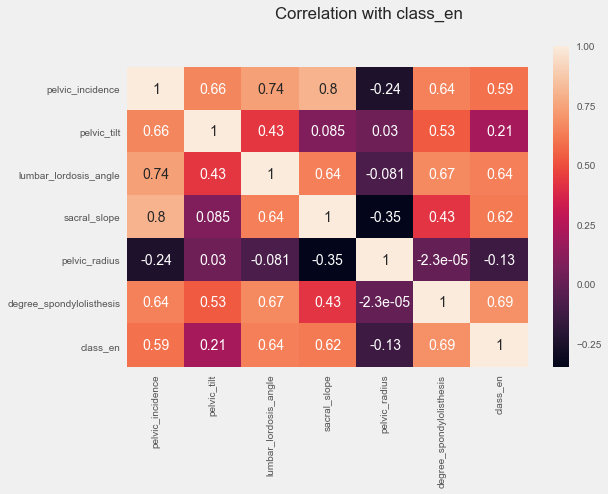

In [115]:
corrLE = dfLE.corr()
sb.heatmap(corrLE, annot=True)
plt.ylim(7,-0.5)
plt.suptitle('Correlation with class_en')

Dapat dilihat dari tabel korelasi di atas, bahwa degree spondylolisthesis memiliki korelasi tertinggi dengan 0.69 dan pelvic radius memiliki korelasi terendah dengan -0.13. Seluruh korelasi features bernilai positif terhadap target kecuali pelvic radius yang bernilai negatif.

### Pair Plot

Plot-plot yang berpasangan dalam dataset. Secara default, fungsi ini akan membuat kisi Sumbu sehingga setiap variabel numerik dalam data akan dibagikan oleh sumbu y melintasi satu baris dan pada sumbu x melintasi satu kolom disertai dengan pengkategorian target.

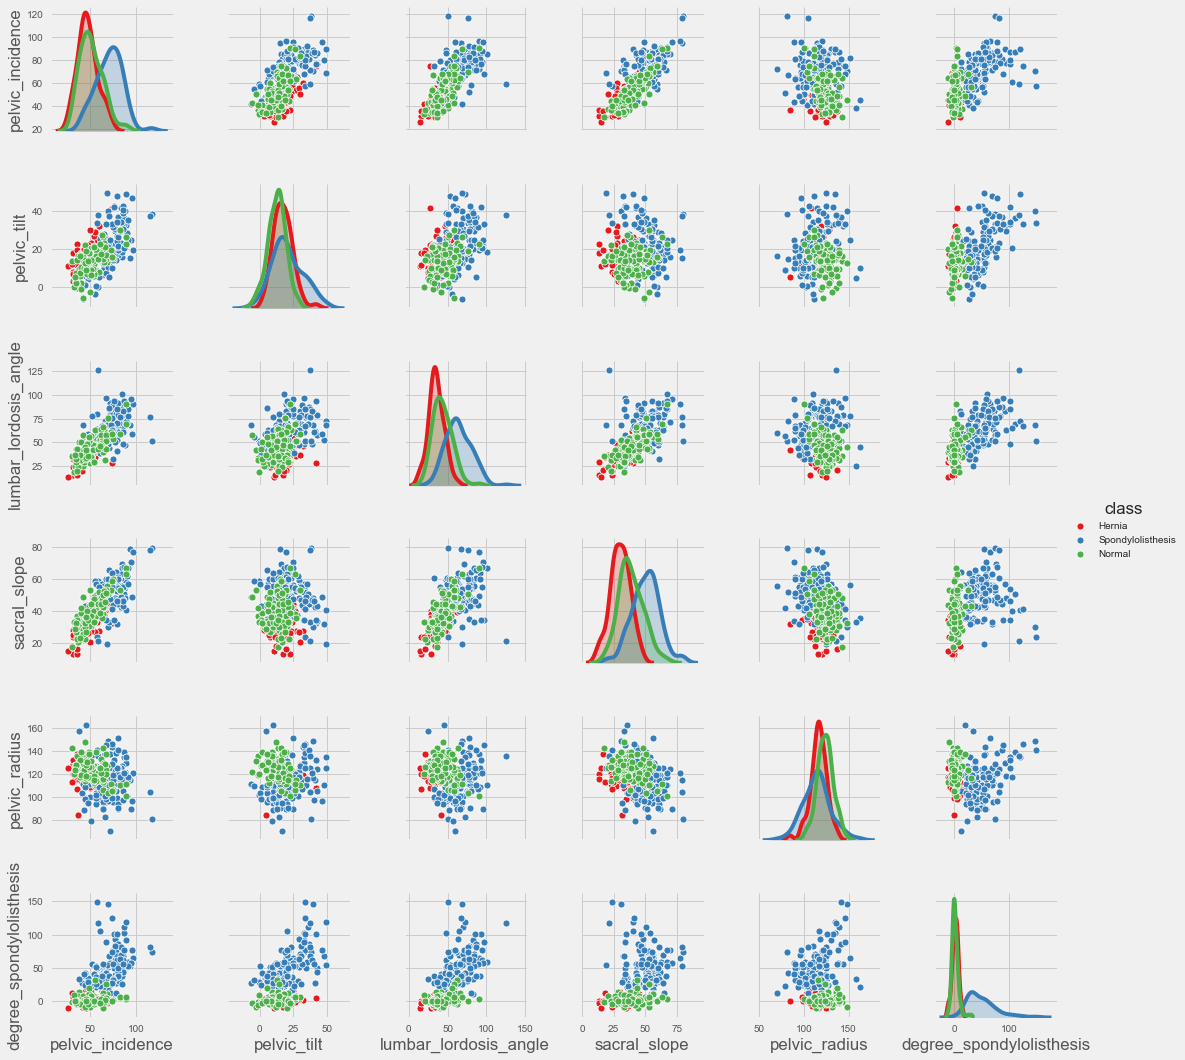

In [139]:
sb.pairplot(data=df0, hue="class", palette="Set1")
plt.show()   # pairplot without standard deviaton fields of data

### Relation Each Features
### - Pelvic Incidence & Pelvic Tilt

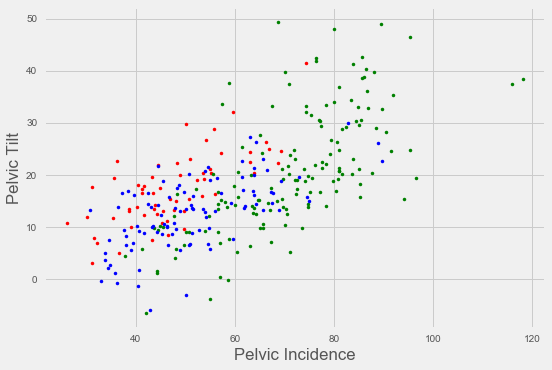

In [125]:
plt.plot(
    df0['pelvic_incidence'][df0['class'] == 'Hernia'],
    df0['pelvic_tilt'][df0['class'] == 'Hernia'], 'r.')
plt.plot(
    df0['pelvic_incidence'][df0['class'] == 'Spondylolisthesis'],
    df0['pelvic_tilt'][df0['class'] == 'Spondylolisthesis'], 'g.')
plt.plot(
    df0['pelvic_incidence'][df0['class'] == 'Normal'],
    df0['pelvic_tilt'][df0['class'] == 'Normal'], 'b.')
plt.xlabel('Pelvic Incidence')
plt.ylabel('Pelvic Tilt')
plt.show()

### - Pelvic Incidence & Sacral SLope

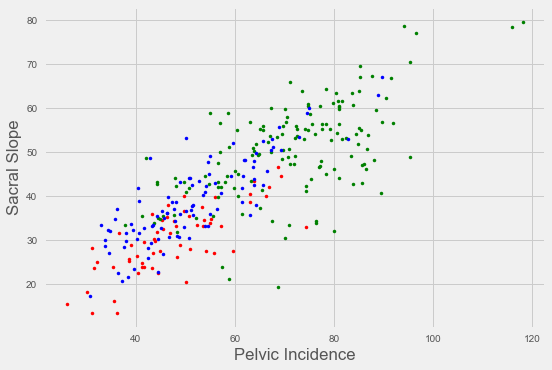

In [126]:
plt.plot(
    df0['pelvic_incidence'][df0['class'] == 'Hernia'],
    df0['sacral_slope'][df0['class'] == 'Hernia'], 'r.')
plt.plot(
    df0['pelvic_incidence'][df0['class'] == 'Spondylolisthesis'],
    df0['sacral_slope'][df0['class'] == 'Spondylolisthesis'], 'g.')
plt.plot(
    df0['pelvic_incidence'][df0['class'] == 'Normal'],
    df0['sacral_slope'][df0['class'] == 'Normal'], 'b.')
plt.xlabel('Pelvic Incidence')
plt.ylabel('Sacral Slope')
plt.show()

### One Hot Encoding

In [110]:
ohe = OneHotEncoder(dtype=np.int64)
oheName = ohe.fit(df0[['class']])
oheName.categories_

[array(['Hernia', 'Normal', 'Spondylolisthesis'], dtype=object)]

In [111]:
oheTarget = ohe.fit_transform(df0[['class']]).toarray()
oheTarget

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [114]:
class_OHE = pd.DataFrame(oheTarget, columns = ohe.categories_[0])
dfOHE = pd.concat([df0, class_OHE], axis=1)
dfOHE

isthesis       0   
179     157.848799                 33.607027  Spondylolisthesis       0   
180      90.298468                 31.326411  Spondylolisthesis       0   
181     106.829590                 54.965789  Spondylolisthesis       0   
182     125.164232                 67.771190  Spondylolisthesis       0   
183     125.430176                 38.181782  Spondylolisthesis       0   
184     117.307897                 52.623047  Spondylolisthesis       0   
185      90.071880                 49.159426  Spondylolisthesis       0   
186     109.033075                 30.265785  Spondylolisthesis       0   
187     120.840707                 61.959034  Spondylolisthesis       0   
188     117.042244                 62.765348  Spondylolisthesis       0   
189      88.434242                 40.880923  Spondylolisthesis       0   
190      97.404189                 55.752221  Spondylolisthesis       0   
191     146.466001                124.984406  Spondylolisthesis       0   
192     119.237007                 32.666502  Spondylolisthesis       0   
193     116.963416                 25.384247  Spondylolisthesis       0   
194     110.703107                 38.259864  Spondylolisthesis       0   
195      89.822741                 55.995454  Spondylolisthesis       0   
196     135.629418                117.314683  Spondylolisthesis       0   
197     115.208701                 33.172255  Spondylolisthesis       0   
198     118.883388                 31.575823  Spondylolisthesis       0   
199     130.999258                 37.556706  Spondylolisthesis       0   
200     145.601033                 88.301486  Spondylolisthesis       0   
201     132.267285                101.218783  Spondylolisthesis       0   
202      98.727930                 26.975787  Spondylolisthesis       0   
203     101.723334                 25.773174  Spondylolisthesis       0   
204     125.593624                100.292107  Spondylolisthesis       0   
205      96.683903                 77.283072  Spondylolisthesis       0   
206     128.405731                 73.388216  Spondylolisthesis       0   
207     120.944829                 76.730629  Spondylolisthesis       0   
208      94.882336                 28.343799  Spondylolisthesis       0   
209     127.632875                  7.986683             Normal       0   
210     125.846646                  2.001642             Normal       0   
211     129.220682                  4.994195             Normal       0   
212     128.980308                 -0.910941             Normal       0   
213     130.178314                 -3.388910             Normal       0   
214     142.410107                 -2.005373             Normal       0   
215     118.151531                 -1.057986             Normal       0   
216     132.114805                  6.338199             Normal       0   
217     129.385308                  1.009228             Normal       0   
218     106.177751                  3.118221             Normal       0   
219     113.778494                 -0.284129             Normal       0   
220     126.970328                 -0.631603             Normal       0   
221     116.228503                 31.172767             Normal       0   
222     103.582540                 -0.443661             Normal       0   
223     100.501192                  3.040973             Normal       0   
224     125.174221                  3.235159             Normal       0   
225     142.360125                  6.298971             Normal       0   
226     118.686268                  4.815031             Normal       0   
227     123.803413                  3.885773             Normal       0   
228     137.439694                 -3.114451             Normal       0   
229     124.128001                 -4.083298             Normal       0   
230     118.193035                  5.074353             Normal       0   
231     128.517722                  0.970926             Normal       0   
232  

### Pelvic Incidence & Lumbar Lordosis

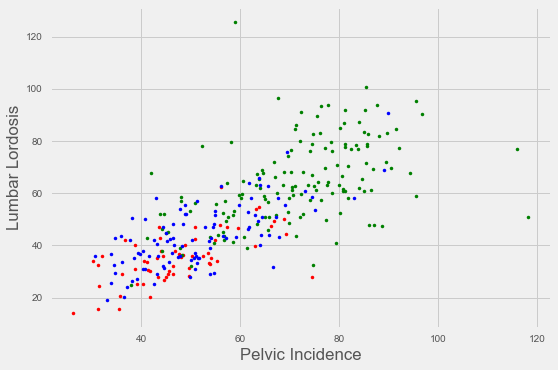

In [151]:
plt.plot(
    df0['pelvic_incidence'][df0['class'] == 'Hernia'],
    df0['lumbar_lordosis_angle'][df0['class'] == 'Hernia'], 'r.')
plt.plot(
    df0['pelvic_incidence'][df0['class'] == 'Spondylolisthesis'],
    df0['lumbar_lordosis_angle'][df0['class'] == 'Spondylolisthesis'], 'g.')
plt.plot(
    df0['pelvic_incidence'][df0['class'] == 'Normal'],
    df0['lumbar_lordosis_angle'][df0['class'] == 'Normal'], 'b.')
plt.xlabel('Pelvic Incidence')
plt.ylabel('Lumbar Lordosis')
plt.show()

### Pelvic Incidence & Degree Spondylolisthesis

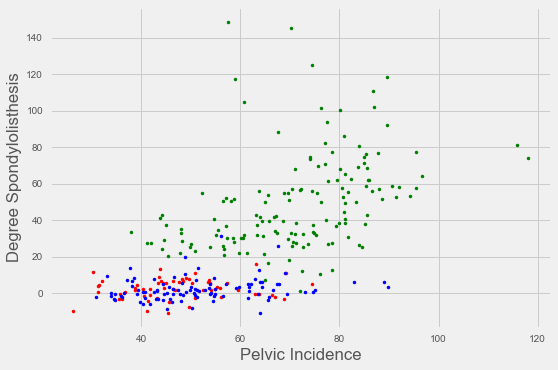

In [150]:
plt.plot(
    df0['pelvic_incidence'][df0['class'] == 'Hernia'],
    df0['degree_spondylolisthesis'][df0['class'] == 'Hernia'], 'r.')
plt.plot(
    df0['pelvic_incidence'][df0['class'] == 'Spondylolisthesis'],
    df0['degree_spondylolisthesis'][df0['class'] == 'Spondylolisthesis'], 'g.')
plt.plot(
    df0['pelvic_incidence'][df0['class'] == 'Normal'],
    df0['degree_spondylolisthesis'][df0['class'] == 'Normal'], 'b.')
plt.xlabel('Pelvic Incidence')
plt.ylabel('Degree Spondylolisthesis')
plt.show()

### Correlation refer to each Class

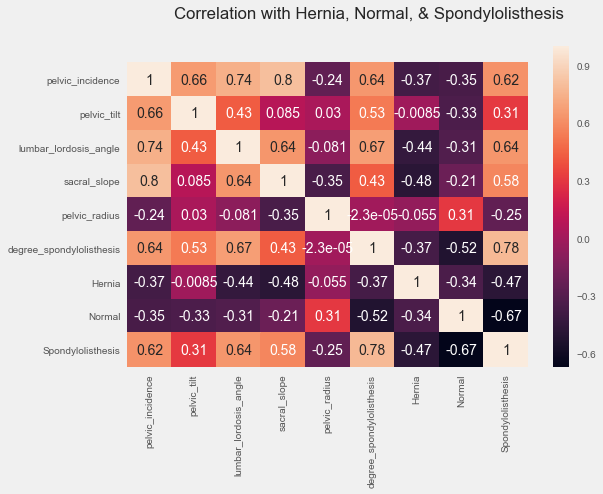

In [117]:
corrOHE = dfOHE.corr()
sb.heatmap(corrOHE, annot=True)
plt.ylim(9,-0.5)
plt.suptitle('Correlation with Hernia, Normal, & Spondylolisthesis')
plt.show()

Setiap target memiliki korelasi yang berbeda terhadap features yang ada, degree spondylolisthesis menjadi korelasi terbesar untuk Spondylolisthesis (positif korelasi) dengan 0.78, degree spondylolisthesis juga menjadi korelasi terbesar untuk Hernia (negatif korelasi) dengan -0.52, dan sacral slope sebagai korelasi terbesar untuk target Normal (positif korelasi) dengan -0.48.

In [153]:
features = df0.iloc[:,:-1]
features

58.000000     48.179830   
237         69.004913    13.291790              55.570143     55.713123   
238         56.447026    19.444499              43.577846     37.002527   
239         41.646916     8.835549              36.031975     32.811367   
240         51.529358    13.517847              35.000000     38.011510   
241         39.087264     5.536602              26.932038     33.550662   
242         34.649922     7.514783              43.000000     27.135140   
243         63.026300    27.336240              51.605017     35.690060   
244         47.805559    10.688698              54.000000     37.116861   
245         46.637864    15.853717              40.000000     30.784147   
246         49.828135    16.736435              28.000000     33.091700   
247         47.319648     8.573680              35.560252     38.745967   
248         50.753290    20.235060              37.000000     30.518231   
249         36.157830    -0.810514              33.627314     36.968344   
250         40.746996     1.835524              50.000000     38.911472   
251         42.918041    -5.845994              58.000000     48.764035   
252         63.792425    21.345323              66.000000     42.447102   
253         72.955644    19.576971              61.007071     53.378673   
254         67.538182    14.655042              58.001429     52.883139   
255         54.752520     9.752520              48.000000     45.000000   
256         50.160078    -2.970024              42.000000     53.130102   
257         40.349296    10.194748              37.967747     30.154548   
258         63.619192    16.934508              49.349262     46.684684   
259         54.142408    11.935110              43.000000     42.207298   
260         74.976021    14.921705              53.730072     60.054317   
261         42.517272    14.375671              25.323565     28.141601   
262         33.788843     3.675110              25.500000     30.113733   
263         54.503685     6.819910              47.000000     47.683775   
264         48.170746     9.594217              39.710920     38.576530   
265         46.374088    10.215902              42.700000     36.158185   
266         52.862214     9.410372              46.988052     43.451842   
267         57.145851    16.489091              42.842148     40.656760   
268         37.140150    16.481240              24.000000     20.658910   
269         51.311771     8.875541              57.000000     42.436230   
270         42.515610    16.541216              42.000000     25.974394   
271         39.358705     7.011262              37.000000     32.347443   
272         35.877571     1.112374              43.457257     34.765197   
273         43.191915     9.976664              28.938149     33.215251   
274         67.289712    16.717514              51.000000     50.572198   
275         51.325464    13.631223              33.258578     37.694240   
276         65.756348    13.206926              44.000000     52.549422   
277         40.413366    -1.329412              30.982768     41.742778   
278         48.801909    18.017762              52.000000     30.784147   
279         50.086153    13.430044              34.457541     36.656108   
280         64.261507    14.497866              43.902504     49.763642   
281         53.683380    13.447022              41.584297     40.236358   
282         48.995958    13.113820              51.873520     35.882137   
283         59.167612    14.562749              43.199158     44.604863   
284         67.804694    16.550662              43.256802     51.254033   
285         61.734875    17.114312              46.900000     44.620563   
286         33.041688    -0.324678              19.071075     33.366366   
287         74.565015    15.724320              58.618582     58.840695   
288         44.430701    14.174264              32.243495     30.256437   
289         36.422485    13.879424              20.242562     22.543061  

### Standard Scaler

In [158]:
ss = StandardScaler()
ss_fit = ss.fit(features)
ss_tf = ss.transform(features)

In [165]:
print(ss_fit)
print(ss_tf)
print(ss_tf.shape)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.16424008  0.49827932 -0.66476126 -0.1757711  -1.44918495 -0.83755111]
 [-1.26450066 -0.75153306 -1.45136007 -1.08276319 -0.26669975 -0.6779149 ]
 [ 0.51018928  0.46485146 -0.0997261   0.30922449 -0.89958471 -0.9460782 ]
 ...
 [ 0.06999424  0.51252499 -0.31111261 -0.31195521  0.58002152 -0.91883185]
 [-0.8952086  -0.88838797 -0.55836265 -0.48514745  0.04450181 -0.82200874]
 [-1.57534993 -1.25049373 -0.82472945 -1.10080227  0.4503311  -0.83572403]]
(309, 6)


In [162]:
dfSS = pd.DataFrame(ss_tf, columns=['PI','PT','LL','SS','PR','DS'])
dfSS

PI        PT        LL        SS        PR        DS
0    0.164240  0.498279 -0.664761 -0.175771 -1.449185 -0.837551
1   -1.264501 -0.751533 -1.451360 -1.082763 -0.266700 -0.677915
2    0.510189  0.464851 -0.099726  0.309224 -0.899585 -0.946078
3    0.537904  0.708418 -0.411318  0.153619 -1.208999 -0.457699
4   -0.629374 -0.792446 -1.273382 -0.208517 -0.735462 -0.566793
5   -1.193379 -0.365240 -1.445454 -1.293539  0.930062 -0.755224
6   -0.407646 -0.170895 -0.796448 -0.405428  0.196455 -0.630730
7   -0.888416 -0.682035 -1.234523 -0.639100 -0.051388 -1.182802
8   -0.982384 -0.404075 -0.498659 -0.983171  0.529826 -0.388874
9   -1.405796 -1.256808 -0.538656 -0.871052 -2.533884 -0.807111
10  -0.629747 -0.453379 -1.110761 -0.476772 -0.699419 -1.088388
11  -1.730870  0.014350 -1.964237 -2.305810  0.157963 -0.812567
12  -0.676896  0.239341 -0.629474 -1.086316  0.102791 -0.563136
13  -0.399347  0.288994 -1.015601 -0.757602 -0.525161 -0.595738
14  -0.177143  0.661995 -0.266395 -0.757602 -0.086224 -0.638071
15  -0.950871 -0.503704 -0.853968 -0.862720  0.463153 -0.649704
16   0.212350  0.279157  0.140680  0.061045 -0.424234 -0.849747
17  -1.728270 -1.443527 -1.044545 -1.151078  0.831114 -0.709097
18  -1.285901 -0.412980 -1.128790 -1.378486  0.391254 -0.781776
19  -1.105181 -0.532110 -1.176083 -1.044843 -0.102826 -0.870349
20  -0.974478 -0.339621 -0.760518 -1.023590  1.240716 -0.615388
21  -0.319045  0.349176 -0.525113 -0.698677  0.545597 -0.748535
22   0.166970  0.684498  0.110904 -0.319210 -0.866574 -0.306361
23  -0.878043 -0.450515 -1.166611 -0.808181  0.002034 -0.994341
24  -1.439214  0.518907 -1.236590 -2.317633 -0.178633 -0.936380
25  -0.366401  0.908284 -0.895418 -1.202981  0.262559 -0.777071
26  -2.033920 -0.681650 -2.045086 -2.157909  0.544889 -1.163495
27  -0.994855 -0.106407 -0.266395 -1.234771 -0.652565 -0.531202
28  -0.937037  0.436103 -1.355929 -1.586547 -0.517177 -0.741255
29   0.393796  0.732343 -0.143579 -0.056308 -0.336481 -0.895576
30  -0.563429 -0.217132 -0.507384 -0.575424 -0.433005 -0.469028
31  -0.827412 -0.649674 -1.067531 -0.583787 -1.441546 -0.617535
32  -0.914050 -0.012863 -1.302317 -1.201527  0.001996 -0.644609
33  -1.287966 -0.458835 -0.643693 -1.345013  0.523154 -0.739576
34  -0.040335  1.443339 -0.290097 -1.193273  0.103467 -0.780282
35  -1.715860 -0.975127 -1.490737 -1.504522 -0.309713 -0.683586
36  -1.679695 -1.058855 -0.859389 -1.390461  1.075640 -0.616654
37  -1.464380  0.187184 -1.683958 -2.089032  1.472185 -0.837852
38  -0.263981  1.128095 -0.229174 -1.240795  0.402724 -0.735951
39  -0.468057  0.143992 -0.866155 -0.734176 -0.104775 -0.772980
40  -1.476957 -0.587379 -1.959366 -1.494032 -0.827902 -0.943761
41  -0.824323 -0.918216 -1.234583 -0.367625 -0.185827 -0.761359
42  -0.382501  0.165911 -1.032900 -0.638072  0.279388 -0.652552
43   0.358402  0.876003 -0.239445 -0.216674  0.245473 -0.855614
44  -0.252839 -0.127515  0.556939 -0.234471 -0.295435 -0.906170
45  -0.557875  0.544562 -0.266395 -1.169572 -0.039949 -0.912830
46  -0.711640  0.465782 -0.849482 -1.311193 -0.042777 -0.614392
47  -1.127678 -0.099555 -1.144627 -1.416256 -0.352290 -0.978135
48  -1.175072  0.040560 -0.967091 -1.589730  0.232437 -0.880055
49  -1.102929  0.032718 -1.720023 -1.487904  0.030788 -0.760780
50  -0.297206  0.286922 -0.967091 -0.620565 -0.156092 -0.711239
51   0.844061  2.399747 -1.306660 -0.776176 -0.751954 -0.663476
52  -0.599763  1.219410 -0.853686 -1.758026  0.777080 -0.638944
53  -1.795387 -0.565791 -0.967091 -1.933199 -0.396075 -0.449361
54  -1.138456 -0.025132 -0.995690 -1.489315 -0.118446 -1.146141
55  -0.751867 -0.429726 -0.822641 -0.657336 -1.480989 -0.621306
56  -1.008645 -1.011021 -1.286960 -0.538677 -0.389156 -0.638524
57  -0.799665 -0.222204 -0.751492 -0.884579 -0.127989 -0.774040
58  -1.017372  0.209184 -0.913191 -1.513842  0.518042 -0.925829
59  -0.724955 -0.264305 -0.882755 -0.752294  0.458690 -0.565819
60   0.840728  1.448828  1.446109 -0.029652  1.924665  1.030259
61   1.752830  1.513995  1.681043  1.127986

In [168]:
dfSS.describe()

PI            PT            LL            SS            PR  \
count  3.090000e+02  3.090000e+02  3.090000e+02  3.090000e+02  3.090000e+02   
mean   3.039640e-16  2.888736e-16  8.048219e-17 -3.032454e-16  7.505683e-16   
std    1.001622e+00  1.001622e+00  1.001622e+00  1.001622e+00  1.001622e+00   
min   -2.033920e+00 -2.413996e+00 -2.045086e+00 -2.317633e+00 -3.598089e+00   
25%   -8.252598e-01 -6.887296e-01 -8.053920e-01 -7.394791e-01 -5.444615e-01   
50%   -9.970018e-02 -1.155537e-01 -1.167939e-01 -2.577900e-02  2.927998e-02   
75%    7.373866e-01  4.611811e-01  5.960014e-01  7.782263e-01  5.656994e-01   
max    3.449381e+00  3.187612e+00  3.977800e+00  2.923046e+00  3.391100e+00   

                 DS  
count  3.090000e+02  
mean   1.401252e-17  
std    1.001622e+00  
min   -1.195467e+00  
25%   -7.762911e-01  
50%   -4.493607e-01  
75%    5.252113e-01  
max    4.098903e+00

In [181]:
df1 = dfSS
df1['class'] =  df0['class']
df1

70 -0.057422  0.786592  1.638306 -0.113854  1.085098   
127  1.802503  1.070570  0.963271  1.544007 -1.282382  1.119632   
128  1.011147 -0.083521 -0.116794  1.406354 -0.545930  0.488976   
129 -0.608279 -0.845647 -1.065811 -0.138540 -1.371051  0.057624   
130  0.566752 -0.379691  0.326503  1.051141  0.073426 -0.235636   
131  0.557530  0.355221  0.044423  0.458555 -0.086487  0.986892   
132  1.280406  0.255240  1.003507  1.495770  0.110587  1.009752   
133 -0.480853 -0.035991  1.409616 -0.609007  1.429486  0.990942   
134  1.004260  1.278416  1.376528  0.321703 -0.551885  1.890537   
135  1.654123  2.228391  1.607941  0.432979 -0.101636  1.051467   
136  1.378285  1.674734  1.427313  0.504547 -0.562756  0.816452   
137  0.702232  0.713207  1.505507  0.367674 -0.810351  1.040206   
138  1.479545  0.349933  2.144799  1.684974 -0.668298  0.430858   
139  0.553787 -0.217239  1.212533  0.905666 -0.968567  0.154841   
140  1.742362  3.134763  1.081284 -0.165811  1.253740  3.091778   
141  1.491148  0.070686  2.630405  1.920877 -0.548160  1.121662   
142  0.021097  0.302514  0.678752 -0.210929 -0.054734  2.644734   
143 -0.013594 -0.326445  0.328597  0.239772 -0.963733  0.178294   
144  1.512225  2.512993  1.444958  0.020126 -0.962800  0.591684   
145  1.508525  1.289138  1.416969  0.981700 -0.232078  1.436093   
146 -0.309430 -2.134348  0.218703  1.275308 -0.604181  0.223496   
147  0.326829 -0.774357 -0.060341  1.044762 -1.019105  0.473076   
148  1.131115  0.637576 -0.600751  0.995936 -1.452973  0.386914   
149  1.242152  0.311968  0.471332  1.400262 -1.798998  0.512956   
150 -0.729641 -1.360969  0.345072  0.107530  0.555988  0.330386   
151  0.186690 -0.345888 -0.205121  0.520628 -0.453809  0.223858   
152 -0.177934 -0.242431  0.649901 -0.044426 -0.091575  0.176043   
153 -1.137497 -1.178558 -0.489141 -0.577183 -1.097731  0.087228   
154  0.389360 -0.302237  1.085676  0.754821 -2.668076  0.551865   
155  1.144663  0.916466  1.008387  0.793656  0.047721  1.214941   
156 -0.956977 -1.607372 -0.314347  0.000753 -0.700824  0.589135   
157 -0.192945 -1.723567 -0.147923  1.105329 -1.120293  0.899044   
158  0.238565 -0.506640  0.903358  0.716341 -1.706273  0.476476   
159  1.892643  1.782959  1.373072  1.100925 -0.167629  1.094251   
160  0.416679 -1.038316 -0.013234  1.372317 -1.514713  0.566822   
161  3.449381  2.088802 -0.059499  2.923046 -2.775670  1.623855   
162  3.316979  1.995346  1.339818  2.821332 -0.996283  1.860897   
163 -0.377324 -0.827012 -0.476577  0.152903  0.484348  0.001817   
164  1.396558  0.269724  1.356559  1.638306  0.565699  1.466023   
165 -0.195550 -1.070390  0.273088  0.586062 -0.599470  0.390350   
166  0.719490 -0.115221  0.427242  1.044762 -3.598089 -0.429171   
167  2.092689  0.725403  2.329290  2.201263 -2.153104  1.081109   
168 -0.954771 -1.647992 -0.751492  0.035755 -1.479160 -0.036993   
169  0.270437 -0.239957  0.371778  0.547991 -0.471551 -0.119929   
170  1.080546 -0.353198  1.495818  1.711316 -0.993830 -0.418563   
171 -0.214808 -0.411634 -0.440506  0.040314 -1.823544 -0.129837   
172 -0.563085 -0.851211  0.234873 -0.074236 -2.927880 -0.065786   
173  0.067916  0.781605 -0.692371 -0.527202 -1.093543 -0.105478   
174 -0.221035 -0.861564  0.034250  0.387368 -1.441353  0.850567   
175  0.402644 -0.429314  0.765807  0.872782 -1.295667  0.296895   
176  1.224579  0.166746  0.522830  1.491648 -2.140756  0.634095   
177  1.214836  0.877657  0.482711  0.917327  0.161578  0.909062   
178  0.503626  3.187612  0.868519 -1.849640  0.531000  0.982732   
179 -1.333226 -1.310014 -1.467805 -0.732834  2.998587  0.284236   
180  0.259378 -0.234832  0.845674  0.529284 -2.078624  0.208682   
181  0.903912  1.397436  2.029735  0.094689 -0.836114  0.991826   
182  0.639523  1.995380  1.756845 -0.727986  0.541953  1.416053   
183  1.238814  0.323078  2.147478  1.387063  0.561941  0.435792   
184  1.859411  0.693941  1.761329  1.916869 -0.048544  0.914213   
185  1.240347  0.368537  1.445826  1.353196 -2.095655  0.7

In [194]:
df1_LE = df1
df1_LE['class_en'] =  dfLE['class_en']
df1_LE

4873 -0.074236 -2.927880 -0.065786   
173  0.067916  0.781605 -0.692371 -0.527202 -1.093543 -0.105478   
174 -0.221035 -0.861564  0.034250  0.387368 -1.441353  0.850567   
175  0.402644 -0.429314  0.765807  0.872782 -1.295667  0.296895   
176  1.224579  0.166746  0.522830  1.491648 -2.140756  0.634095   
177  1.214836  0.877657  0.482711  0.917327  0.161578  0.909062   
178  0.503626  3.187612  0.868519 -1.849640  0.531000  0.982732   
179 -1.333226 -1.310014 -1.467805 -0.732834  2.998587  0.284236   
180  0.259378 -0.234832  0.845674  0.529284 -2.078624  0.208682   
181  0.903912  1.397436  2.029735  0.094689 -0.836114  0.991826   
182  0.639523  1.995380  1.756845 -0.727986  0.541953  1.416053   
183  1.238814  0.323078  2.147478  1.387063  0.561941  0.435792   
184  1.859411  0.693941  1.761329  1.916869 -0.048544  0.914213   
185  1.240347  0.368537  1.445826  1.353196 -2.095655  0.799468   
186  0.008802 -1.231316  0.424289  0.984038 -0.670496  0.173545   
187  1.514440  2.108866  1.656801  0.342202  0.216988  1.223503   
188  1.319273  1.171014  1.353539  0.824107 -0.068511  1.250215   
189 -0.986672 -0.776447  0.003104 -0.694793 -2.218743  0.525211   
190  1.561643  2.274325  0.495802  0.274112 -1.544545  1.017879   
191  0.846176  1.571897  0.808480 -0.119618  2.143034  3.311456   
192  0.594731 -0.723605  1.316645  1.359820  0.096451  0.253078   
193  0.737387  0.135743  0.865500  0.870299 -0.074436  0.011826   
194  0.653818 -1.231056  1.835673  1.838879 -0.544973  0.438379   
195  0.208619 -0.481152  0.723233  0.656516 -2.114381  1.025937   
196 -0.086060  2.001593  3.977800 -1.694742  1.328536  3.057367   
197  0.869147 -0.366523  0.579468  1.441603 -0.206324  0.269833   
198  0.895611 -0.090138  0.504167  1.258423  0.069872  0.216945   
199  0.184298  0.245351  0.838480  0.050556  0.980524  0.415084   
200  0.431575  1.571140  2.389950 -0.668625  2.078021  2.096196   
201  0.956141  2.437402  2.228348 -0.657336  1.075832  2.524130   
202  0.796520 -0.786519  0.596001  1.676997 -1.445050  0.064551   
203 -0.222750 -0.319688 -0.374650 -0.042824 -1.219910  0.024710   
204  1.182487  1.637859  1.787272  0.274112  0.574226  2.493430   
205  2.098508  2.899280  0.380402  0.492265 -1.598683  1.731170   
206  0.823864  0.125199  1.298431  0.993262  0.785590  1.602138   
207  1.633535  0.279468  2.257322  1.944753  0.224814  1.712868   
208 -0.715974 -0.115554 -0.841551 -0.857858 -1.734092  0.109872   
209 -1.297382 -0.060842 -0.907111 -1.671791  0.727500 -0.564534   
210 -0.318961  0.139676 -0.018377 -0.533124  0.593244 -0.762811   
211 -0.948273 -0.863147 -0.271672 -0.575424  0.846843 -0.663672   
212 -0.712457 -0.012034 -0.212495 -0.934945  0.828776 -0.859301   
213 -0.868447 -0.691615 -0.504747 -0.605063  0.918821 -0.941394   
214 -1.760102 -0.421963 -0.864492 -2.000004  1.838185 -0.895559   
215 -0.557836 -1.090109 -1.134368  0.121380  0.014865 -0.864173   
216 -1.319953 -1.102054 -0.080706 -0.879466  1.064371 -0.619146   
217 -0.515424 -0.160389 -0.913191 -0.556598  0.859217 -0.795689   
218  0.240774  0.876055 -0.053007 -0.372646 -0.885107 -0.725820   
219 -0.940717  0.421624 -1.103234 -1.579991 -0.313821 -0.838536   
220 -0.317166 -1.171316  0.057004  0.504547  0.677702 -0.850047   
221 -0.248455 -0.446842  0.576437  0.023514 -0.129674  0.203592   
222  0.543972  0.132670  1.294885  0.616331 -1.080168 -0.843821   
223  1.762015  0.506947  2.081665  1.935429 -1.311768 -0.728379   
224 -0.032551 -0.985267  0.183317  0.734916  0.542703 -0.721946   
225  0.219773 -0.151224  0.602671  0.410757  1.834428 -0.620446   
226  0.075597  0.210566  0.051195 -0.066071  0.055056 -0.669607   
227 -1.324724 -0.927557 -1.385524 -1.023590  0.439671 -0.700392   
228 -1.003468 -0.748056 -0.857555 -0.739479  1.464600 -0.932301   
229  0.318254  0.556843  0.573481 -0.017855  0.464068 -0.964398   
230 -0.379148 -0.463550 -0.697593 -0.136542  0.017984 -0.661016   
231 -1.022452 -0.375862 -0.624969 -1.058566  0.794007 -0.796958   
232 -1.16

Text(0.5, 0.98, 'Correlation with class_en')

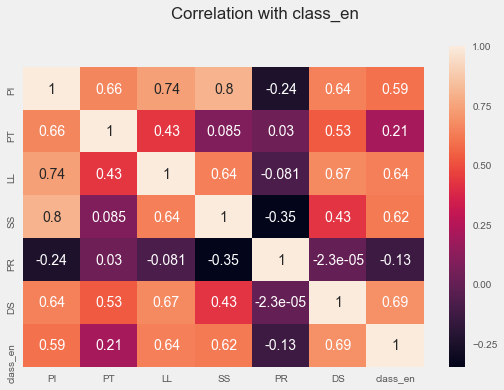

In [196]:
corr1_LE = df1_LE.corr()
sb.heatmap(corr1_LE, annot=True)
plt.ylim(7,-0.5)
plt.suptitle('Correlation with class_en')

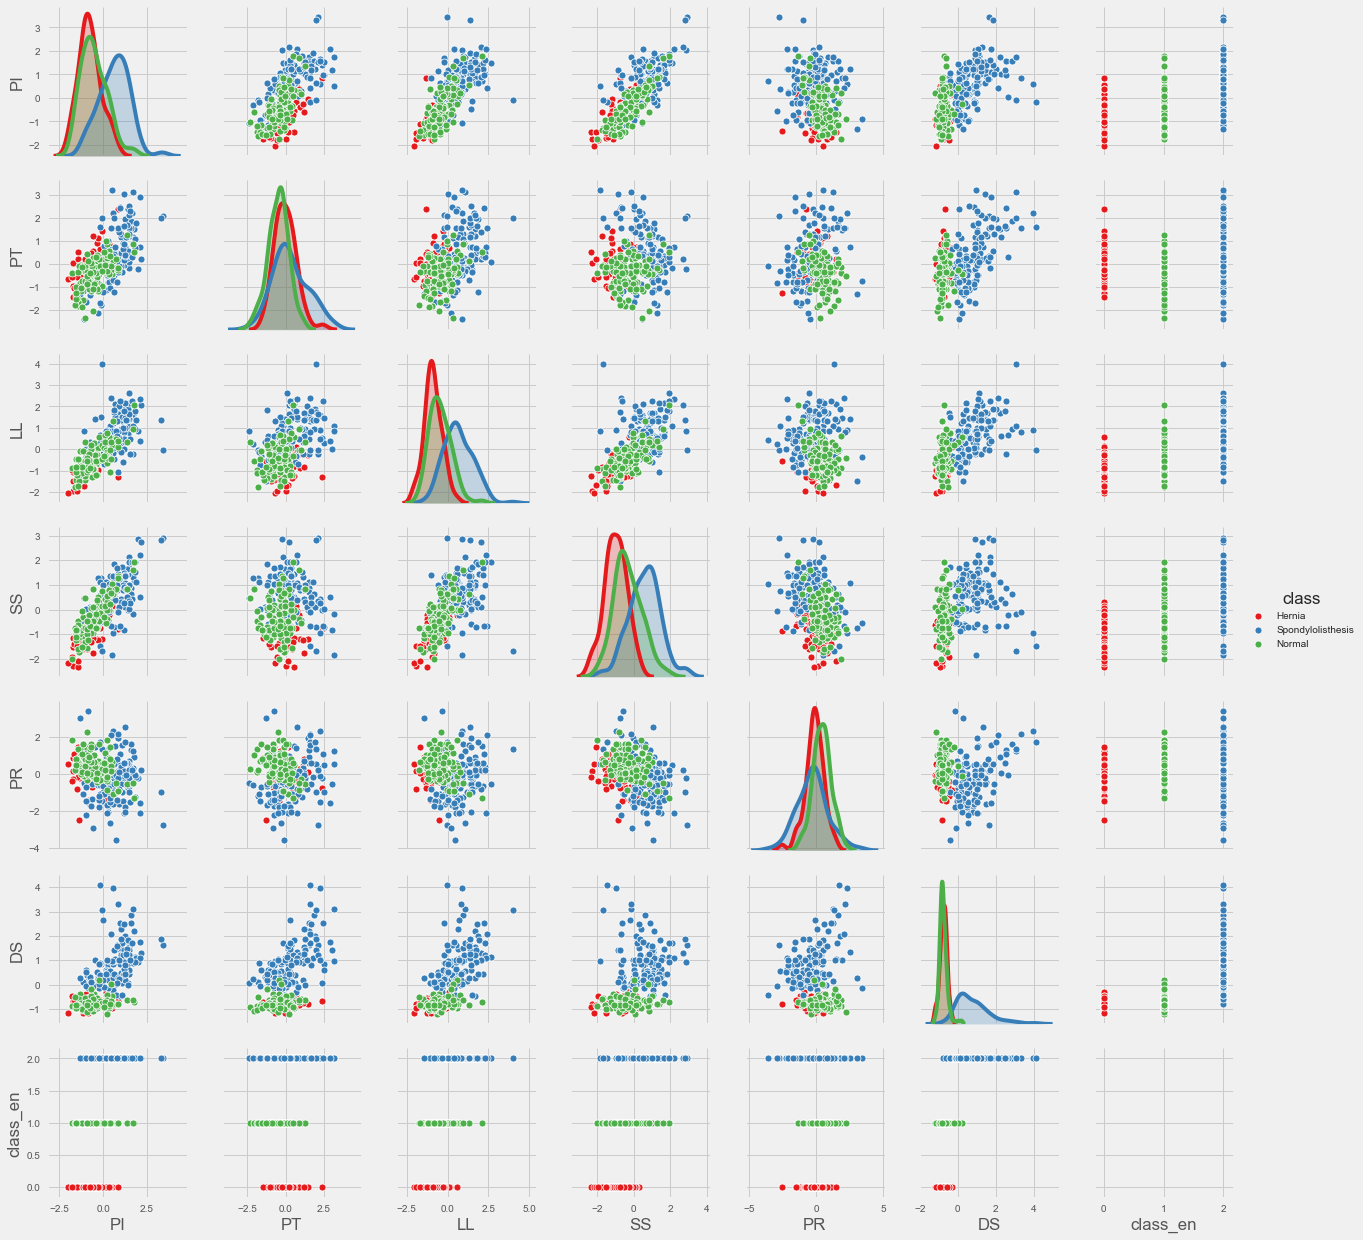

In [197]:
sb.pairplot(data=df1, hue="class", palette="Set1")
plt.show()   # pairplot without standard deviaton fields of data

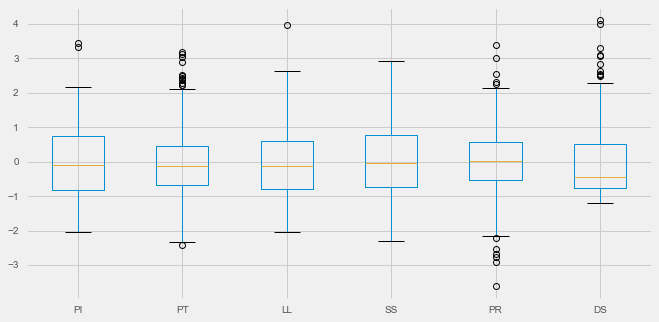

In [182]:
plt.figure(figsize=(10,5))
df1.boxplot()
plt.show()

Dari pengulangan EDA setelah standar scaler, dapat disimpulkan bahwa standart scaler tidak mengubah sebaran dari data tersebut.

In [216]:
# df0.profile_report()

In [215]:
profile = df0.profile_report(title = 'Pandas Profiling Report')
profile.to_file(output_file="Vertebrae_data_profiling.html")

build report structure: 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]


In [218]:
dfLE.to_csv('data_spinal.csv', index=False)
df1_LE.to_csv('ss_spinal.csv', index=False)

In [221]:
joblib.dump(ss_fit, 'fit_ss')

['fit_ss']